# House Price Prediction

In [1]:
# importing libraries and data

import pandas as pd
data=pd.read_csv('chennai_house_price_prediction.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [2]:
data.shape

(7109, 19)

## Variable identification

In [3]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [4]:
#finding missing values using describe

data.describe(include = 'all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P01752,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [5]:
data.isnull().sum() #another method to find missing values

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
# finding unique count 
data.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [7]:
#combining data_type , missing values , unique count 

info=pd.DataFrame({'dtypes':data.dtypes,'missing':data.isnull().sum(),'unique':data.nunique()})
info


,dtypes,missing,unique
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


 conclusion-
 * we need to fill the missing values in three variables and 
 * change categories of few variables which have very few unique count

## Univariate analysis 

analysing independent variables one at a time based on inferences/observations we manipulate them

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 

##### categorical variables - let us find counts for each variable and plot the bar graphs 

In [9]:
data['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

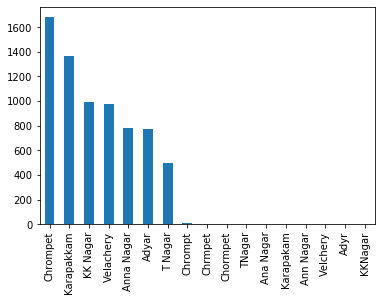

In [10]:
data['AREA'].value_counts().plot.bar()

* inference-we find that there are spelling mistakes and no missing values  
* require- spelling correction

In [11]:
# for the reamaining categorical variables 
#and also for the variables we wish to transform into categorical type (n_)
a=['SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'N_BEDROOM' , 'N_BATHROOM' , 'N_ROOM']
for i in a:
    print(i+':')
    print(data[i].value_counts())
    print()
    

SALE_COND:
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

PARK_FACIL:
Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

BUILDTYPE:
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

UTILITY_AVAIL:
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

STREET:
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

MZZONE:
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

N_BEDROOM:
1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

N_BATHROOM:
1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

N_ROOM:
4    2563
3    2125
5    1246
2     9

* SALE_COND , PARK_FACIL , BUILD_TYPE , UTILITY_AVAIL, STREET : requires spelling corrections
* N_BEDROOM , N_BATHROOM , N_ROOM : requires change of category as they have very few values


Text(0.5, 1.0, 'MZZONE')

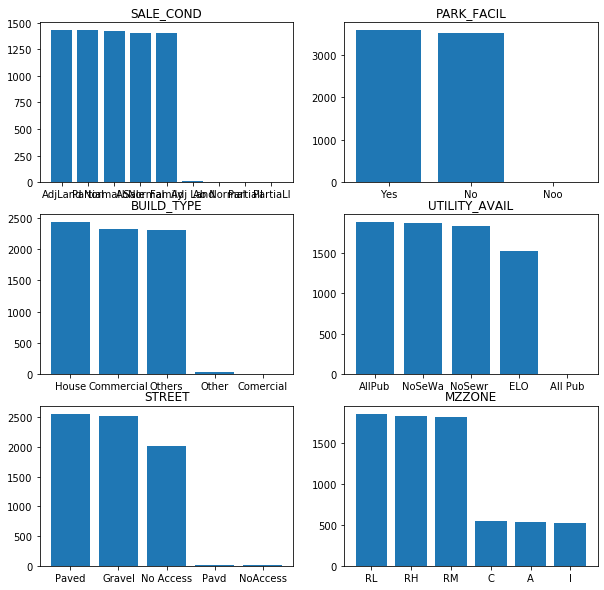

In [12]:
#lets plot bar graphs 

fig,axs= plt.subplots(3,2,figsize=(10,10))

axs[0,0].bar(data['SALE_COND'].value_counts().index,data['SALE_COND'].value_counts().values)
axs[0,0].set_title('SALE_COND')
axs[0,1].bar(data['PARK_FACIL'].value_counts().index,data['PARK_FACIL'].value_counts().values)
axs[0,1].set_title('PARK_FACIL')
axs[1,0].bar(data['BUILDTYPE'].value_counts().index,data['BUILDTYPE'].value_counts().values)
axs[1,0].set_title('BUILD_TYPE')
axs[1,1].bar(data['UTILITY_AVAIL'].value_counts().index,data['UTILITY_AVAIL'].value_counts().values)
axs[1,1].set_title('UTILITY_AVAIL')
axs[2,0].bar(data['STREET'].value_counts().index,data['STREET'].value_counts().values)
axs[2,0].set_title('STREET')
axs[2,1].bar(data['MZZONE'].value_counts().index,data['MZZONE'].value_counts().values)
axs[2,1].set_title('MZZONE')

Text(0.5, 1.0, 'ROOM')

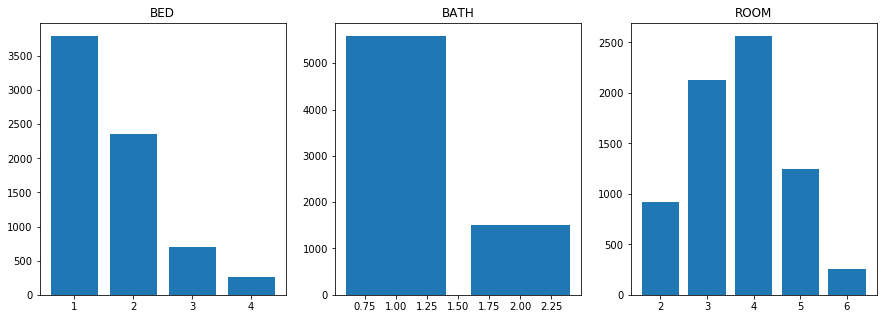

In [13]:
fig,axs= plt.subplots(1,3,figsize=(15,5))
axs[0].bar(data['N_BEDROOM'].value_counts().index,data['N_BEDROOM'].value_counts().values)
axs[0].set_title('BED')
axs[1].bar(data['N_BATHROOM'].value_counts().index,data['N_BATHROOM'].value_counts().values)
axs[1].set_title('BATH')
axs[2].bar(data['N_ROOM'].value_counts().index,data['N_ROOM'].value_counts().values)
axs[2].set_title('ROOM')


inferences about percentages of each attribute in each variable can be found by dividing value_counts with len(value_counts)

#### continuous variables - we draw the distributions for  each variable to identify outliers  and also the skewness

In [14]:
data.dtypes # To find out continuous variables

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

INT_SQFT , DIST_MAINROAD , QS_ROOMS ,QS_BATHROOM , QS_BEDROOM , QS_OVERALL , COMMIS , SALES_PRICE are continuous variables

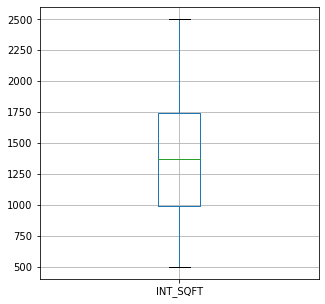

In [15]:
data.boxplot(column='INT_SQFT',figsize=(5,5))
    

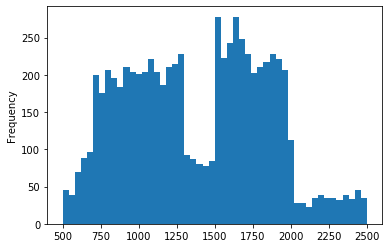

In [16]:
data['INT_SQFT'].plot.hist(bins=50)

we make a note that there are no outliers in sqft and majority of the houses have sqft between 750 and 1250 and also 1500 and 2000

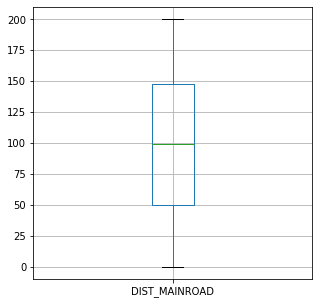

In [17]:
data.boxplot(column='DIST_MAINROAD',figsize=(5,5))

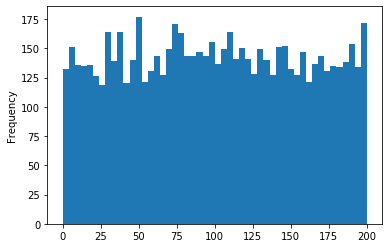

In [18]:
data['DIST_MAINROAD'].plot.hist(bins=50)

we observe that there are no outliers in dist to mainroad and it is distributed uniformly 

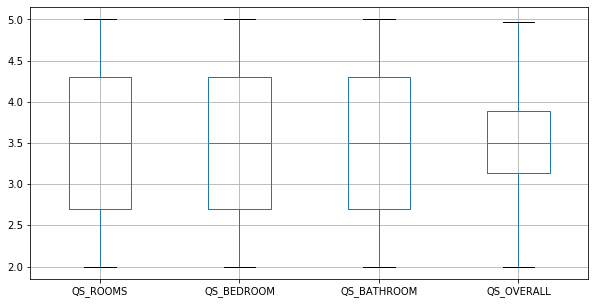

In [19]:
data.boxplot(column=['QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL'],figsize=(10,5))

no outliers in above variables

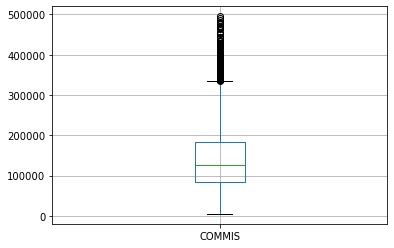

In [20]:
data.boxplot(column='COMMIS')

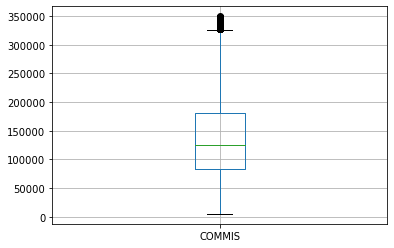

In [21]:
y=data[data['COMMIS']<350000]
y.boxplot(column='COMMIS')

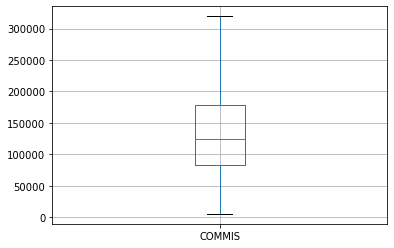

In [22]:
y=data[data['COMMIS']<320000]
y.boxplot(column='COMMIS')

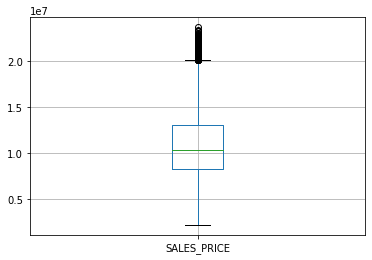

In [23]:
data.boxplot(column='SALES_PRICE')

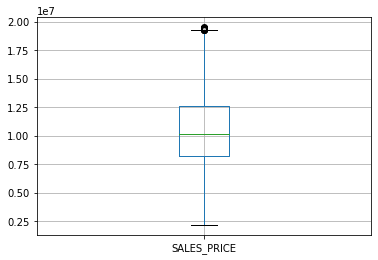

In [24]:
X=data.loc[data['SALES_PRICE']<19500000]
X.boxplot(column='SALES_PRICE')

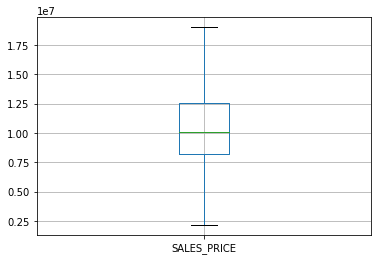

In [25]:
X=data.loc[data['SALES_PRICE']<19000000]
X.boxplot(column='SALES_PRICE')

SO outliers are found in target variable 'sales_price' AND commis variable 
* they should be manipulated during data manipulation

## Data manipulation

* drop duplicates if any
* we need to fill the missing values in three variables and 
* change categories of few variables which have very few unique count
* spelling corrections
* outliers manipulation

#### 1.drop duplicates

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.shape

(7109, 19)

as the shape remained same before and after dropping we conclude that there are no duplicates

#### 2. filling missing values

In [28]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [29]:
data['N_BEDROOM'].fillna(value = (data['N_BEDROOM'].mode()[0]), inplace=True)
data['N_BATHROOM'].fillna(value = (data['N_BATHROOM'].mode()[0]), inplace=True)


In [30]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [31]:
def fill_na(x):
    return (x['QS_BEDROOM']+x['QS_BATHROOM']+x['QS_ROOMS'])/3
data['QS_OVERALL']=data.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'] ,axis=1)

In [32]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

#### 3. change categories of variables

In [33]:
data=data.astype({'N_BEDROOM':'object' ,'N_BATHROOM':'object' , 'N_ROOM' : 'object'})

In [34]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

#### 4.spelling corrections

In [35]:
data['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)

data['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

data['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)

data['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)

data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)

data['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

In [36]:
a=['SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET']
for i in a:
    print(i+':')
    print(data[i].value_counts())
    print()

SALE_COND:
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

PARK_FACIL:
Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

BUILDTYPE:
House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

UTILITY_AVAIL:
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

STREET:
Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64



#### 5. replacing outliers 

In [37]:
data.loc[data['COMMIS']>300000,'COMMIS']=data['COMMIS'].mean()

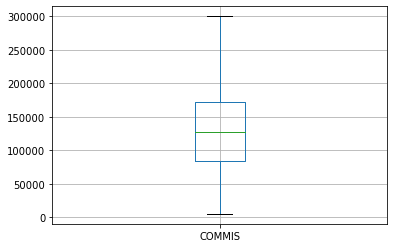

In [38]:
data.boxplot(column='COMMIS')

## Bivariate Analysis


### continuous variables 

* INT_SQFT – The interior Sq. Ft of the property
* DIST_MAINROAD – The distance of the property to the main road 
* QS_ROOMS – The quality score assigned for rooms based on buyer reviews 
* QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews 
* QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews 
* QS_OVERALL – The Overall quality score assigned for the property 
* COMMIS – The Commission paid to the agent 



### categorical variables
* AREA – The property in which the real estate is located 
* N_BEDROOM – The number of Bedrooms 
* N_BATHROOM - The number of bathrooms 
* N_ROOM – Total Number of Rooms 
* SALE_COND – The Sale Condition 
* PARK_FACIL – Whether parking facility is available 
* BUILDTYPE – The type of building 
* UTILITY_AVAIL
* TREET
* MZZONE


### target variable
* SALES_PRICE – The total sale price of the property 

In [42]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS           float64
SALES_PRICE        int64
dtype: object

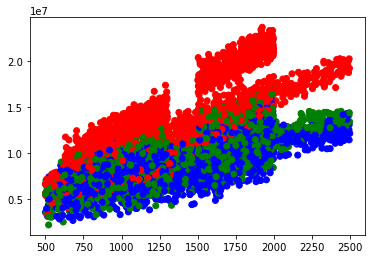

In [44]:
import matplotlib.pyplot as plt
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
plt.scatter(data['INT_SQFT'], data['SALES_PRICE'], c=data['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

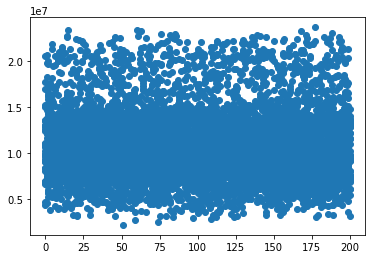

In [45]:
plt.scatter(data['DIST_MAINROAD'], data['SALES_PRICE'])

Text(0.5, 1.0, 'QS_OVERALL')

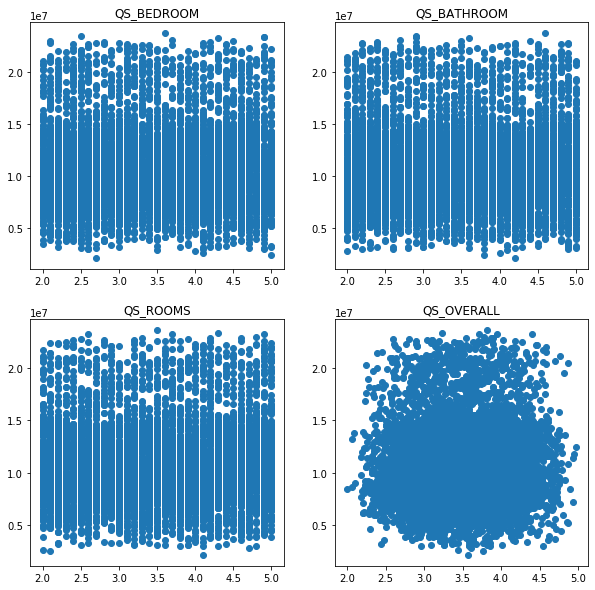

In [47]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))


axs[0, 0].scatter(data['QS_BEDROOM'], data['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(data['QS_BATHROOM'], data['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(data['QS_ROOMS'], data['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(data['QS_OVERALL'], data['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')



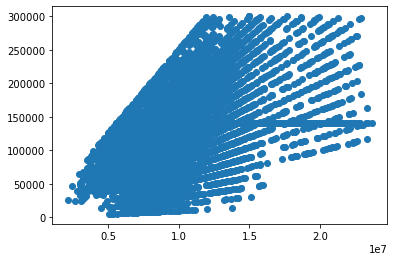

In [48]:
plt.scatter(data['SALES_PRICE'], data['COMMIS'])

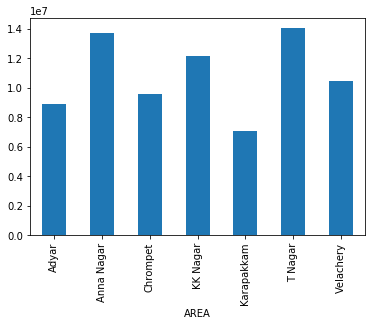

In [50]:
data.groupby('AREA')['SALES_PRICE'].median().plot.bar()

In [53]:
data.pivot_table(index='N_BATHROOM',columns='N_BEDROOM',values='SALES_PRICE',aggfunc='median')

N_BEDROOM,1.0,2.0,3.0,4.0
N_BATHROOM,,,,
1.0,9168740.0,12131870.0,NaN,NaN
2.0,NaN,9117500.0,11663490.0,13172000.0


In [54]:
data.groupby('BUILDTYPE')['SALES_PRICE'].median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

In [55]:
data.pivot_table(index='BUILDTYPE',values='SALES_PRICE',aggfunc='median')

,SALES_PRICE
BUILDTYPE,
Commercial,13356200
House,8985370
Others,9637260


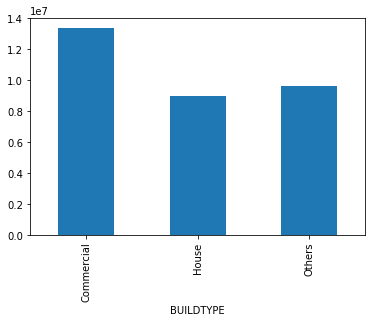

In [56]:
data.groupby('BUILDTYPE')['SALES_PRICE'].median().plot.bar()

## Model Building

In [69]:
data.drop(['PRT_ID'], axis=1, inplace = True) #the given variable has no significance in determining sales price

In [70]:
#convert categorical varibles to continuos variable

data=pd.get_dummies(data)

In [71]:
#seperating dependent and independent variables
x = data.drop('SALES_PRICE', axis=1)
y= data['SALES_PRICE']

In [72]:
#creating train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,test_size=0.33)


In [73]:
#creating linear model
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_log_error as MSLE

a=LR(normalize=True)
a.fit(x_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [77]:
import numpy as np
y_test_predict=a.predict(x_test)
score=np.sqrt(MSLE(y_test,y_test_predict))
score

0.09522475015214876